#Penerapan Algoritma Random Forest Untuk Klasifikasi Tumor Payudara

Sumber data: https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

Dataset yang digunakan bersifat multivariate dengan subject area kesehatan dan medis. Dataset memiliki 30 fitur yang digunakan untuk memodelkan klasifikasi jenis tumor payudara (M = malignant, B = Benign).

In [1]:
# Instalasi library
!pip install pandas -q
!pip install numpy -q
!pip install sklearn -q
!pip install matplotlib -q
!pip install seabord -q

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
ERROR: Could not find a version that satisfies the requirement seabord (from versions: none)
ERROR: No matching distribution found for seabord


In [23]:
# Import library yang digunakan

# Data preprocessing
import pandas as pd
import numpy as np

# Modeling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Visualisasi Tree
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

## 1. Analisa Data

Pada tahap pertama, mari kita lakukan eksplorasi data yang akan digunakan.

Import dataset dari sumber menggunakan third-party library

In [3]:
!pip install ucimlrepo -q

In [4]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

# metadata
print(breast_cancer_wisconsin_diagnostic.metadata)

# variable information
print(breast_cancer_wisconsin_diagnostic.variables)

{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

Seperti yang kita lihat pada hasil eksekusi cell di atas, dataset yang akan digunakan tidak memiliki missing value sehingga data sudah termasuk cukup bersih.

Selanjutnya, mari kita liat 5 data pertama yang ada pada dataset

In [5]:
# Melihat entry data pada fitur
X.head(5)

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
# Melihat tipe data fitur
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   radius1             569 non-null    float64
 1   texture1            569 non-null    float64
 2   perimeter1          569 non-null    float64
 3   area1               569 non-null    float64
 4   smoothness1         569 non-null    float64
 5   compactness1        569 non-null    float64
 6   concavity1          569 non-null    float64
 7   concave_points1     569 non-null    float64
 8   symmetry1           569 non-null    float64
 9   fractal_dimension1  569 non-null    float64
 10  radius2             569 non-null    float64
 11  texture2            569 non-null    float64
 12  perimeter2          569 non-null    float64
 13  area2               569 non-null    float64
 14  smoothness2         569 non-null    float64
 15  compactness2        569 non-null    float64
 16  concavit

In [8]:
# Melihat entry data pada target
y.head(5)

,Diagnosis
0,M
1,M
2,M
3,M
4,M


In [10]:
# Melihat tipe data target
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Diagnosis  569 non-null    object
dtypes: object(1)
memory usage: 4.6+ KB


Berdasarkan hasil ekesekusi kedua cell tersebut, kita dapat melihat bahwa fitur sudah memiliki tipe data yang sesuai untuk modeling yaiut float64. Sedangkan fitur masih berupa character M dan B sehingga kita perlu melakukan encoding untuk menggambarkan representasi fitur menjadi numerik.

## 2. Data Preprocessing

In [11]:
# Melihat value unik yang terdapat pada kolom target
y['Diagnosis'].unique()

array(['M', 'B'], dtype=object)

Karena target column masih dalam bentuk karakter, kita akan encode value menjadi :

- M -> 1
- B -> 0

In [15]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

y_encoded = label_encoder.fit_transform(y['Diagnosis'])

print(f"Label yang digunakan: {label_encoder.classes_}")
print(f"Hasil encoding: {np.unique(y_encoded)}")

Label yang digunakan: ['B' 'M']
Hasil encoding: [0 1]


Sekarang label sudah dalam bentuk representasi numerik sehingga cocok untuk dijalankan pada algoritma machine learning.

## 3. Persiapan training model

Sebelum kita melakukan training, kita akan melakukan beberapa tahapan persiapan salah satunya adalah split data menjadi trainset dan testset

In [16]:
# Membuat train dan test set

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, random_state=42, stratify=y, test_size=0.2)

In [17]:
# Menghitung proporsi class pada training set

category_counts = pd.Series(y_train).value_counts(normalize=True)

category_percentage = (category_counts / category_counts.sum()) * 100

print(category_percentage)

0    62.637363
1    37.362637
Name: proportion, dtype: float64


Jika kita lihat, jumlah class yang termasuk Benign tidak sebanyak jumlah class yang termasuk Malignant.

In [18]:
len(X_train), len(X_test)

(455, 114)

## 4. Training model (supervised)

Selanjutnya kita akan melakukan training model menggunakan algoritma Random Forest untuk melihat apakah kita bisa memprediksi jenis tumor payudara berdasarkan hasil pengukuran tertentu (features)

In [20]:
# Inisialisasi object random forest classifier

rf_model = RandomForestClassifier(random_state=42, n_estimators=100) # menggunakan 100 tree estimator

rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [22]:
# Melakukan prediksi pada test set
y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Akurasi: {accuracy}")
print("")
print(f"Classification Report:\n{report}")

Akurasi: 0.9736842105263158

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



## 5. Evaluasi model menggunakan confusion matrix

Sebelumnya kita telah melihat model memiliki performa yang cukup baik yaitu 97% akurasi pada test set dan mendapatkan f1-score yang cukup tinggi. Selanjutnya kita akan mengevaluasi lebih jauh untuk melihat lebih jelas performa model menggunakan confusion matrix

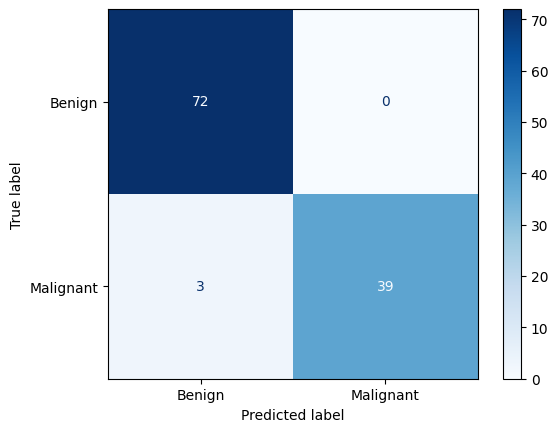

In [26]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Menampilkan confusion matrix dengan ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Benign', 'Malignant'])
disp.plot(cmap=plt.cm.Blues)

# Save hasil visualisasi
plt.savefig('Confusion Matrix Model.png')

Berdasarkan hasil tersebut, kita dapat melihat perbandingan prediksi yang cukup akurat jika kita bandingkan hasil prediksi model dengan true label pada test set

## 6. Menyimpan model

Menyimpan model menggunakan joblib untuk bisa diload ulang di dashboard app

In [28]:
import joblib

model_filename = "random_forest_breast_cancer.pkl"
joblib.dump(rf_model, model_filename)

print(f"Model berhasil disimpan sebagai {model_filename}")

Model berhasil disimpan sebagai random_forest_breast_cancer.pkl


## 7. Training unsupervised

Sekarang kita akan melakukan unsupervised training menggunakan algoritma K-means untuk dapat memahami lebih dalam bagaimana relasi similarity fitur pada dataset.

Karena kita sudah mengetahui terdapat dua label pada dataset kita, maka kita akan set jumlah class menjadi dua pada proses training algoritma K-means.

Kita akan scale fitur pada data terlebih dahulu supaya memiliki scale yang seimbang

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Fit data pada algoritma K-means

In [31]:
# Inisialisasi object model algoritma
from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters=2, random_state=42)
kmeans_model.fit(X_scaled)

KMeans(n_clusters=2, random_state=42)

## 8. Visualisasi hasil cluster

Karena fitur pada dataset cukup banyak yaitu 30, maka kita harus melakukan dimensionality reduction dengan teknik PCA untuk bisa memvisualisasikan hasil cluster

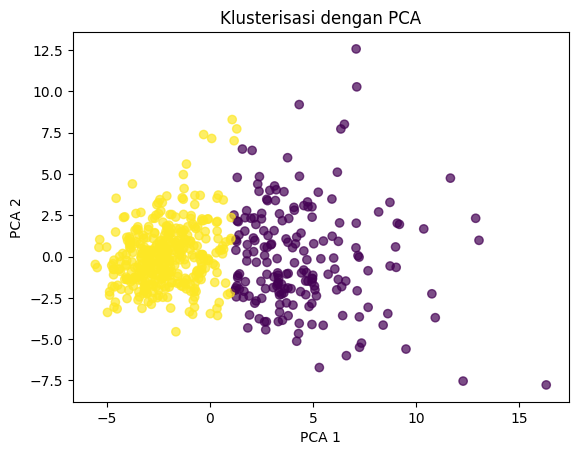

<Figure size 640x480 with 0 Axes>

In [43]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

clusters = kmeans_model.labels_

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.7)

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Klusterisasi dengan PCA')
plt.show()

plt.savefig('K-means_PCA_breast_cancer_classification.png')

Jika kita lihat hasil Principal component 1 & 2 pada hasil visualisasi tersebut, kita dapat melihat bahwa masing masing data point terpisah cukup jelas pada hasil clustering menggunakan K-means